In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set()

In [2]:
bac_df = pdr.get_data_yahoo('BAC', start='2014-01-01') 


In [3]:
bac_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-12-31,15.620000,15.510000,15.600000,15.57,57188900.0,14.383145
2014-01-02,16.160000,15.680000,15.690000,16.10,148709900.0,14.872746
2014-01-03,16.500000,16.230000,16.270000,16.41,129921800.0,15.159114
2014-01-06,16.730000,16.559999,16.629999,16.66,114431300.0,15.390057
2014-01-07,16.790001,16.450001,16.770000,16.50,110605100.0,15.242256


In [4]:
bac_df.drop(['Adj Close'],axis =1 , inplace =True)

In [5]:
bac_df['9-Day'] = bac_df['Close'].rolling(9).mean()
bac_df['21-Day'] = bac_df['Close'].rolling(21).mean()
bac_df['Change'] = np.log(bac_df['Close']/bac_df['Close'].shift())

In [6]:
bac_df.tail()

,High,Low,Open,Close,Volume,9-Day,21-Day,Change
Date,,,,,,,,
2019-07-05,29.570000,29.150000,29.360001,29.260000,33092000.0,28.637778,28.316667,0.007203
2019-07-08,29.299999,28.940001,29.010000,29.200001,30924400.0,28.773333,28.379524,-0.002053
2019-07-09,29.420000,28.940001,28.969999,29.350000,28750100.0,28.950000,28.466191,0.005124
2019-07-10,29.400000,28.959999,29.170000,29.020000,40574800.0,29.073333,28.511429,-0.011307
2019-07-11,29.500000,29.030001,29.100000,29.360001,37360000.0,29.201111,28.564762,0.011648


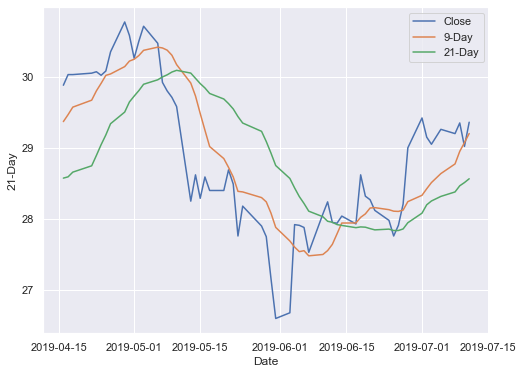

In [7]:
plt.figure(figsize=(8,6))
ax =sns.lineplot(x=bac_df.index[-60:], y= bac_df['Close'][-60:] )
sns.lineplot(x=bac_df.index[-60:], y= bac_df['9-Day'][-60:] )
sns.lineplot(x=bac_df.index[-60:], y= bac_df['21-Day'][-60:] )
plt.legend(title='', loc='upper right', labels=['Close', '9-Day','21-Day']) 

In [8]:
#### the position is going to indicate whether we're long or short.
#### It's either going to have a 1; or, it's going to have a -1; 
bac_df['position'] = np.where( bac_df['9-Day'] >bac_df['21-Day'],1,0) 
bac_df['position'] = np.where( bac_df['9-Day'] < bac_df['21-Day'],-1,bac_df['position']) 

In [9]:
bac_df['system']  = bac_df['position'] * bac_df['Change']

In [10]:
bac_df.tail()

,High,Low,Open,Close,Volume,9-Day,21-Day,Change,position,system
Date,,,,,,,,,,
2019-07-05,29.570000,29.150000,29.360001,29.260000,33092000.0,28.637778,28.316667,0.007203,1,0.007203
2019-07-08,29.299999,28.940001,29.010000,29.200001,30924400.0,28.773333,28.379524,-0.002053,1,-0.002053
2019-07-09,29.420000,28.940001,28.969999,29.350000,28750100.0,28.950000,28.466191,0.005124,1,0.005124
2019-07-10,29.400000,28.959999,29.170000,29.020000,40574800.0,29.073333,28.511429,-0.011307,1,-0.011307
2019-07-11,29.500000,29.030001,29.100000,29.360001,37360000.0,29.201111,28.564762,0.011648,1,0.011648


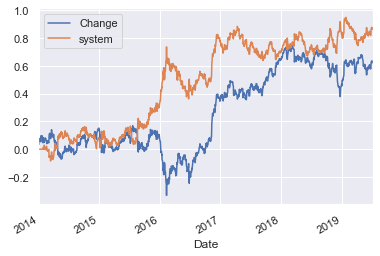

In [11]:
bac_df[['Change', 'system']].cumsum().plot()